## Importing the libraries

In [45]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import data_acquisition as da

## Getting the training and testing data

In [4]:
xdat, ydat = da.labels_binary()
x = np.array(xdat)
y = np.array(ydat)


In [5]:
x.shape

(3000, 512, 512, 1)

In [8]:
from skimage.feature import hog

In [16]:
hog_features = []
hog_images = []
for datum in range(x.shape[0]):
    fd, hog_image = hog(x[datum], orientations = 8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
    hog_features.append(fd)
    hog_images.append(hog_image)

In [29]:
hog_features = np.array(hog_features)
hog_features.shape

(3000, 8192)

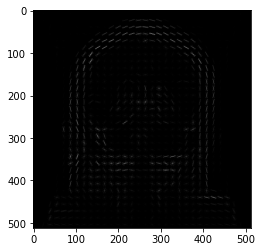

In [20]:
plt.imshow(hog_images[1500], cmap=plt.cm.gray)

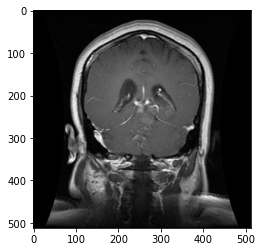

In [6]:
imgplot = plt.imshow(x[1500].reshape(512,512), cmap='Greys_r')


In [ ]:
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512*512))

In [65]:
# Importing the data through the data_acquisition file
x, y = da.labels_binary()
# Converting the 3 dimensional features to one dimension
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512*512))

In [30]:
# Splitting the data onto a test and a train set
xtrain, xtest, ytrain, ytest = train_test_split(hog_features, y, train_size=0.85, random_state=15) 

## Implementing SVM algorithm from the scikit library

In [31]:
# Creating an SVM algorithm using scikit learn
svc_classifier = SVC(kernel = 'linear')
# Alterntively ssince we are doing linear SVC, LinearSVC() function could also have been used
svc_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [32]:
# Predicting the outputs using SVM
y_pred = svc_classifier.predict(xtest)

## Getting accuracy results

In [36]:
print(accuracy_score(ytest, y_pred))

0.9733333333333334


In [37]:
print(classification_report(ytest, y_pred, target_names=['no tumor', 'tumor']))

              precision    recall  f1-score   support

    no tumor       0.90      0.92      0.91        65
       tumor       0.99      0.98      0.98       385

    accuracy                           0.97       450
   macro avg       0.94      0.95      0.95       450
weighted avg       0.97      0.97      0.97       450



In [38]:
conf_mat = confusion_matrix(ytest, y_pred, labels=svc_classifier.classes_)

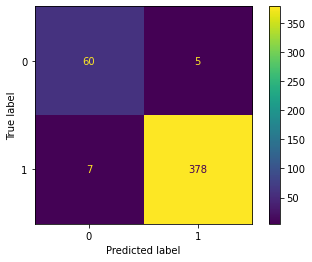

In [39]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=svc_classifier.classes_)
cm_disp.plot()

In [43]:
scaler1 = StandardScaler()
scaler1.fit(hog_features)
scaled_features = scaler1.transform(hog_features)

In [59]:
#pca1 = PCA(random_state=10, n_components=1000)
pca1 = PCA(.95)
pca1.fit(scaled_features)
scaled_features_pca = pca1.transform(scaled_features)

In [63]:
print(pca1.n_components_)

1638


In [60]:
# Splitting the data onto a test and a train set
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features_pca, y, train_size=0.85, random_state=15) 

In [61]:
# Creating an SVM algorithm using scikit learn
svc_classifier1 = SVC(kernel = 'linear')
# Alterntively ssince we are doing linear SVC, LinearSVC() function could also have been used
svc_classifier1.fit(xtrain, ytrain)

SVC(kernel='linear')

0.9777777777777777
              precision    recall  f1-score   support

    no tumor       0.92      0.92      0.92        65
       tumor       0.99      0.99      0.99       385

    accuracy                           0.98       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.98      0.98      0.98       450



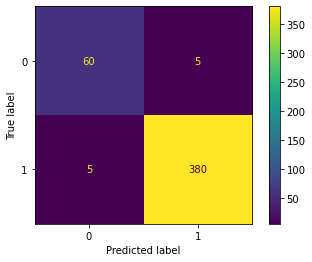

In [62]:
# Predicting the outputs using SVM
y_pred = svc_classifier1.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=['no tumor', 'tumor']))
conf_mat = confusion_matrix(ytest, y_pred, labels=svc_classifier.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=svc_classifier.classes_)
cm_disp.plot()